## Simple demonstration of KalmanFilter with Constant Turn Rate and Velocity (CTRV) Model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from bayesfilt.filters import KalmanFilter
from bayesfilt.models import CTRV_POINT, LinearObservationModel

In [4]:
# generate observations
np.random.seed(30)
dt_true = 0.1
nsamples = 100
tlist = np.linspace(0,nsamples*dt_true, nsamples)
xtrue = np.sin(0.4*tlist**1.1) 
ytrue = np.cos(0.4*tlist**1.3) 
xdata = xtrue + 0.05*np.random.randn(nsamples)
ydata = ytrue + 0.05*np.random.randn(nsamples)
odata = np.vstack([xdata, ydata]).T
len(odata)

100

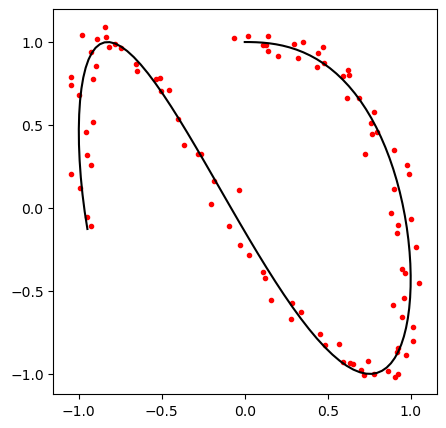

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(xdata, ydata, '.r')
ax.plot(xtrue, ytrue, '-k')
#ax.plot(tlist, ylist, '.r')
ax.set_aspect('equal')

In [7]:
# dynamics model
mm = CTRV_POINT()
mm

TypeError: CTRV_POINT.__init__() missing 2 required positional arguments: 'sigma_hrate' and 'sigma_speed'

In [ ]:
# observation model
om = LinearObservationModel(nx=mm.nx, obs_state_inds=[0,2], xnames=mm.xnames)
om

In [ ]:
# kalman filter
dt=0.05
kf = KalmanFilter(
    nx=mm.nx,
    ny=om.ny,
    dt=dt,
    mat_F=mm.func_Fmat(dt=dt),
    mat_H=om.Hmat,
    mat_Q=mm.func_Qmat(dt=dt),
    xnames=mm.xnames
)
kf

In [ ]:
# initiate and run
kf.initiate(
    t0=tlist[0],
    m0=[odata[0][0],0., odata[0][1], 0.],
    P0=np.diag([0.1, 0.2, 0.1, 0.2]),
    flag='Update'
)
kf.filter(
    list_of_t=tlist[1:],
    list_of_y=odata[1:],
    list_of_R = np.diag([0.1**2, 0.1**2])
)
kf.smoother()
kf.df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(tlist, xtrue, '-k')
ax.plot(tlist, xdata, '.r')
# filter
idx = 0
ax.plot(kf.logger.time_elapsed, kf.logger.state_mean_i(idx), '-b')
ax.fill_between(
    kf.logger.time_elapsed, 
    kf.logger.state_mean_i(idx) - 3*np.sqrt(kf.logger.state_var_ij(idx)), 
    kf.logger.state_mean_i(idx) + 3*np.sqrt(kf.logger.state_var_ij(idx)),
    color='b', alpha=0.1, lw=0
)
# smoother
ax.plot(kf.slogger.time_elapsed, kf.slogger.state_mean_i(idx), '-g')
ax.fill_between(
    kf.slogger.time_elapsed, 
    kf.slogger.state_mean_i(idx) - 3*np.sqrt(kf.slogger.state_var_ij(idx)), 
    kf.slogger.state_mean_i(idx) + 3*np.sqrt(kf.slogger.state_var_ij(idx)),
    color='g', alpha=0.2, lw=0
)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(tlist, ytrue, '-k')
ax.plot(tlist, ydata, '.r')
# filter
idx = 2
ax.plot(kf.logger.time_elapsed, kf.logger.state_mean_i(idx), '-b')
ax.fill_between(
    kf.logger.time_elapsed, 
    kf.logger.state_mean_i(idx) - 3*np.sqrt(kf.logger.state_var_ij(idx)), 
    kf.logger.state_mean_i(idx) + 3*np.sqrt(kf.logger.state_var_ij(idx)),
    color='b', alpha=0.1, lw=0
)
# smoother
ax.plot(kf.slogger.time_elapsed, kf.slogger.state_mean_i(idx), '-g')
ax.fill_between(
    kf.slogger.time_elapsed, 
    kf.slogger.state_mean_i(idx) - 3*np.sqrt(kf.slogger.state_var_ij(idx)), 
    kf.slogger.state_mean_i(idx) + 3*np.sqrt(kf.slogger.state_var_ij(idx)),
    color='g', alpha=0.2, lw=0
)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(xtrue, ytrue, '-k')
ax.plot(xdata, ydata, '.r')
ax.plot(kf.logger.state_mean_i(0), kf.logger.state_mean_i(2), '-b')
ax.plot(kf.slogger.state_mean_i(0), kf.slogger.state_mean_i(2), '-g')
fig.tight_layout()

In [ ]:
kf.df.info()

In [ ]:
kf.dfs.info()